In [ ]:
#pips
#!pip install nltk
#pip install --upgrade pip
#!pip install scikit-learn
#!pip install gensim
#pip install scipy==1.10.1

In [ ]:
#libraries
import nltk
from nltk.corpus import stopwords 

import re

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')

# 1. Text preprocessing

Usual steps for preprocessing:

1. Tokenization 
2. Lowering the case of words
3. Stemming (get the base word, it can lose the meaning)
4. Lemmatization (get the base word with out loosing the meaning)
5. Stopwords
6. Convert words into vectors
    - One Hot Encoding
    - Bag of Words (n-grams)
    - TF-IDF (Term frequency and Inverse Term Frequency)
    - Word2vec


Basic terminology:

- Corpus (all documents together as a paragraph)
- Documents 
- Vocabulary (all unique words, as a dictionary)
- Words 




In [1]:
import nltk

In [56]:
#CORPUS
paragraph="""
Boys are good boy.

Girls are good.

Boys and girls are good.
"""
paragraph

'\nBoys are good boy.\n\nGirls are good.\n\nBoys and girls are good.\n'

In [ ]:
#nltk.download('punkt')

In [57]:
## split paragraph into sentences

sentences=nltk.sent_tokenize(paragraph)
len(sentences)

3

In [17]:
for i in range(len(sentences)):
    print(nltk.word_tokenize(corpus[i]))

['boys', 'are', 'good']
['girls', 'are', 'good']
['boys', 'and', 'girls', 'are', 'good']


In [4]:
#Stemming

from nltk.stem import PorterStemmer 
stemmer=PorterStemmer()
print(stemmer.stem('history'))
print(stemmer.stem('historical'))

histori
histor


In [8]:
#Lemamtizer

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()
print(lemmatizer.lemmatize('history'))
print(lemmatizer.lemmatize('historical'))

history
historical


In [11]:
#Stop words

from nltk.corpus import stopwords   #Stopwords
#nltk.download('stopwords')
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
import re

corpus=[]
for i in range(len(sentences)):
    review=re.sub('[^a-zA-Z]',' ',sentences[i])
    review=review.lower()
    corpus.append(review)

In [58]:
# Remove special characters, lowering the case, Apply Stopswords. Lemmatize
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split() # SPLIT IN WORDS
    #print(review)
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

corpus

['boy good boy', 'girl good', 'boy girl good']

# 2. Word Embeddings

Converting words into vectors

# One Hot Encoding

Advantages:
- Simple to implement

Disadvantages:
- Sparse matrix
- Out of vocabulary (if a new words come in the test data, those will not be considered in the vocabulary)
- Size of the input is not fixed,it depends on the sentence size
- Semantic meaning is not captured (we are lose the order or relations between words) 


# Bag of Words (BOW)

1. Bag of words, keep track of the frequency of each word, more frequent words is the first position.
2. Binary bag of words, is a vector with ones and zeros no matter if a word appears more than one time. 


Advantages:
- Simple and intuitive

Disadvantages:
- Sparsity
- Out of vocabulary
- Order of the words has completely changed
- Semantic meaning is not captured (we are lose the order or relations between words) 


## BOW

In [59]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
cv=CountVectorizer()
X=cv.fit_transform(corpus)
cv.vocabulary_

{'boy': 0, 'good': 2, 'girl': 1}

In [61]:
sentences

['\nBoys are good boy.', 'Girls are good.', 'Boys and girls are good.']

In [62]:
X.toarray()

array([[2, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

## Binary BOW

In [45]:
cv=CountVectorizer(binary=True)
X=cv.fit_transform(corpus)
X.toarray()

array([[1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

## Ngrams

Combination of 2, 3 or n words together to build BOW.

In [65]:
cv=CountVectorizer(binary=True, ngram_range=(2,3))
X=cv.fit_transform(corpus)
cv.vocabulary_

{'boy good': 2,
 'good boy': 5,
 'boy good boy': 3,
 'girl good': 4,
 'boy girl': 0,
 'boy girl good': 1}

In [66]:
X.toarray()

array([[0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 0]])

# TF-IDF (Term Frequency - Inverse Document Frequency)

- Word importance is getting captured
- BOW gives same importance to all values, since values are 0 or 1. TF-IDF give more weightage to the rare words that are not present in all the documents. 
For example:
'Cat eats food', 'Bat eats foos', 'Human eats food?, the rare words are 'cat, bat, huma', TF-IDF will give more weightage to those words.

(computed for every sentence)
$$ Term frequency = \frac{\text{Number of repetitions in sentence}}{\text{Number of words in sentence}} $$ 
(computed for every word)

$$ IDF = log_c\frac{\text{Number of sentences}}{\text{Number of sentences containing the word}} $$ 


$$ TF x IDF$$

- Words present in all the sentences are not important, those will hace zero weightage

Disadvantages:
- Sparsity
- Out of vocabulary

In [68]:
paragraph=""""
The food is good.
The food is not good.
"""""
sentences=nltk.sent_tokenize(paragraph)
sentences

['"\nThe food is good.', 'The food is not good.']

In [69]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(sentences)
X.toarray() # Vectors are very similar however they mean the opposite

array([[1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1]])

In [73]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(ngram_range=(2,3))
X=cv.fit_transform(sentences)
print(cv.vocabulary_)
X.toarray()

{'the food': 7, 'food is': 0, 'is good': 3, 'the food is': 8, 'food is good': 1, 'is not': 4, 'not good': 6, 'food is not': 2, 'is not good': 5}


array([[0.37930349, 0.53309782, 0.        , 0.53309782, 0.        ,
        0.        , 0.        , 0.37930349, 0.37930349],
       [0.30287281, 0.        , 0.42567716, 0.        , 0.42567716,
        0.42567716, 0.42567716, 0.30287281, 0.30287281]])

In [78]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=3) # max features will include top n high frequency words , used to reduce vector size
X=cv.fit_transform(sentences)
print(cv.vocabulary_)
X.toarray()

{'food': np.int64(0), 'is': np.int64(2), 'good': np.int64(1)}


array([[0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027]])

# Word2vect: Feature representation. 

Limited dimensions, sparcity is reduced, semantic meaning.
There are 2 types: CBOW and SKIPGRAMS

For example:
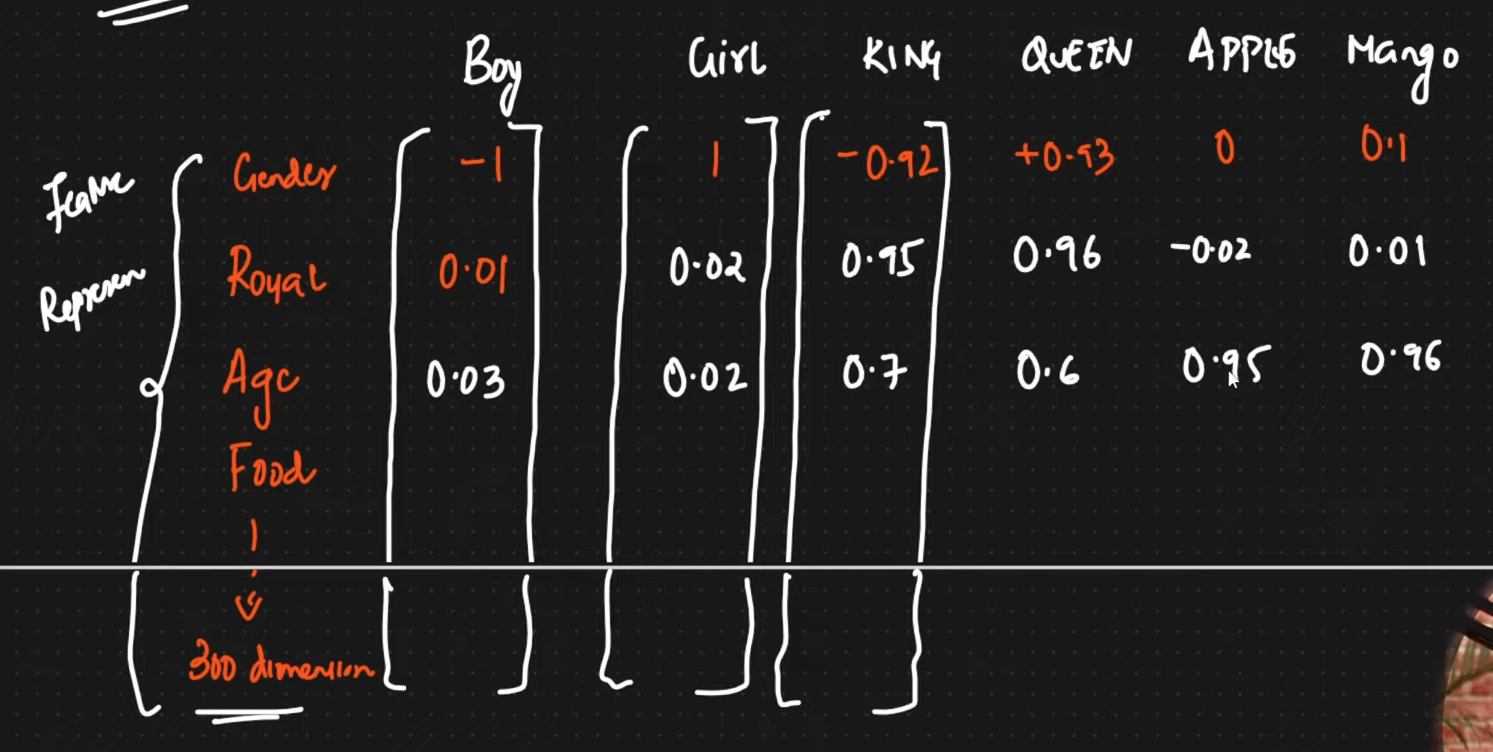

## CBOW (Continuos BOWS)

- We need to define the window size. 
- Make groups of window size # of words
- Identify the center word, this will be our Ouput feature, the rest will be the independet feature. 
- With inputs and outputs we build a Fully conected layer using Neural Networks

Example:

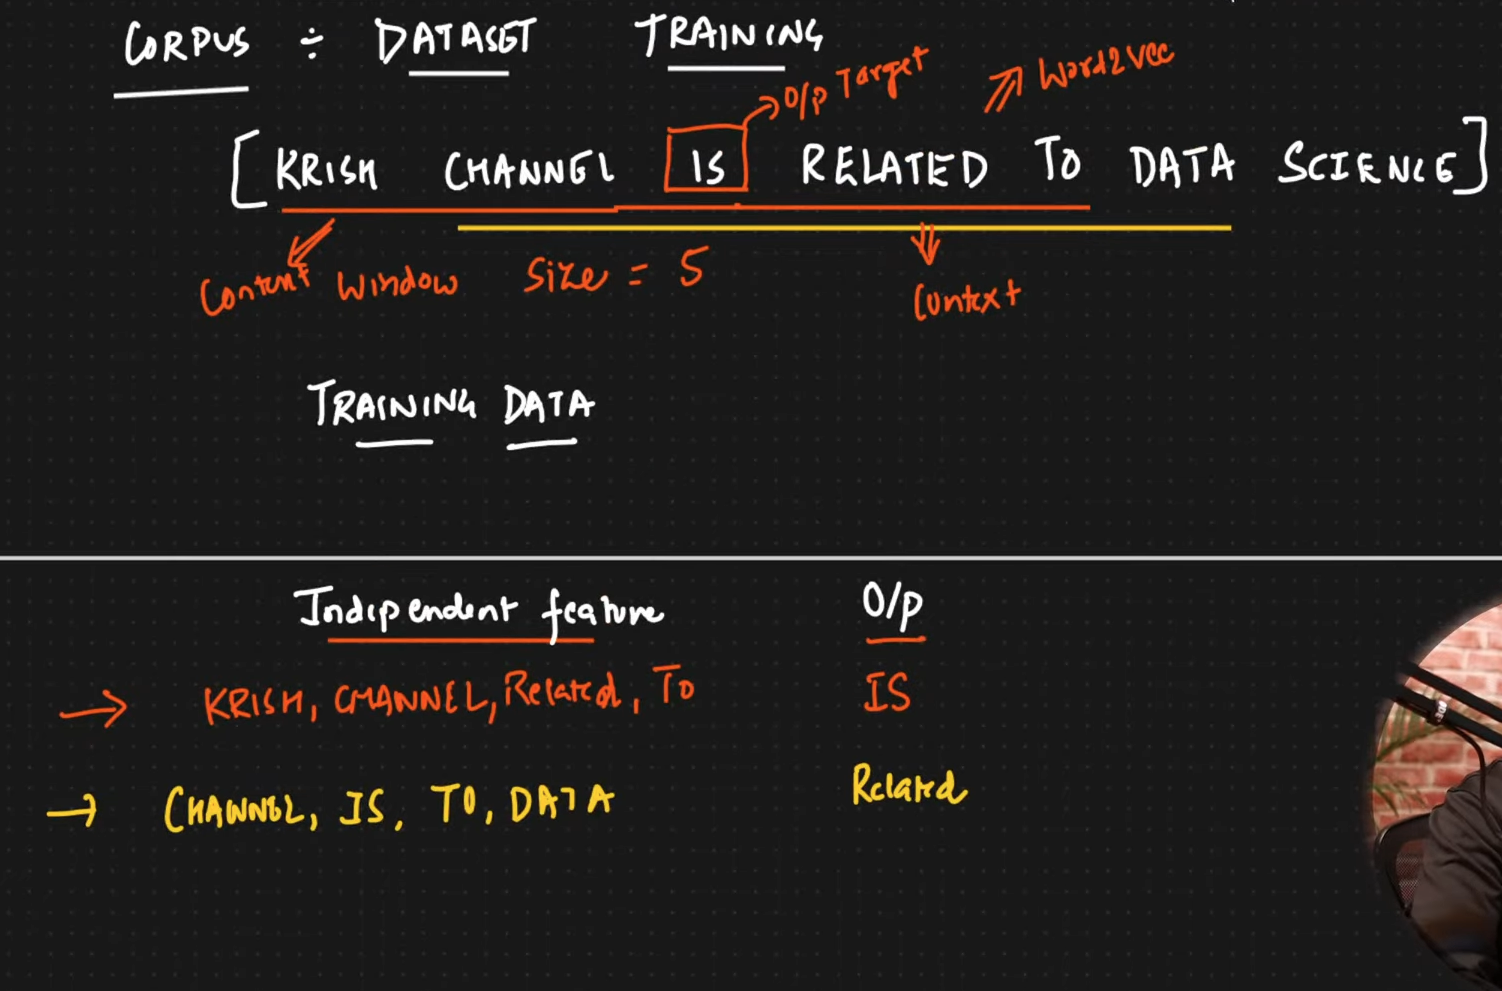


Each output word will be represented by weights learned in the NN.

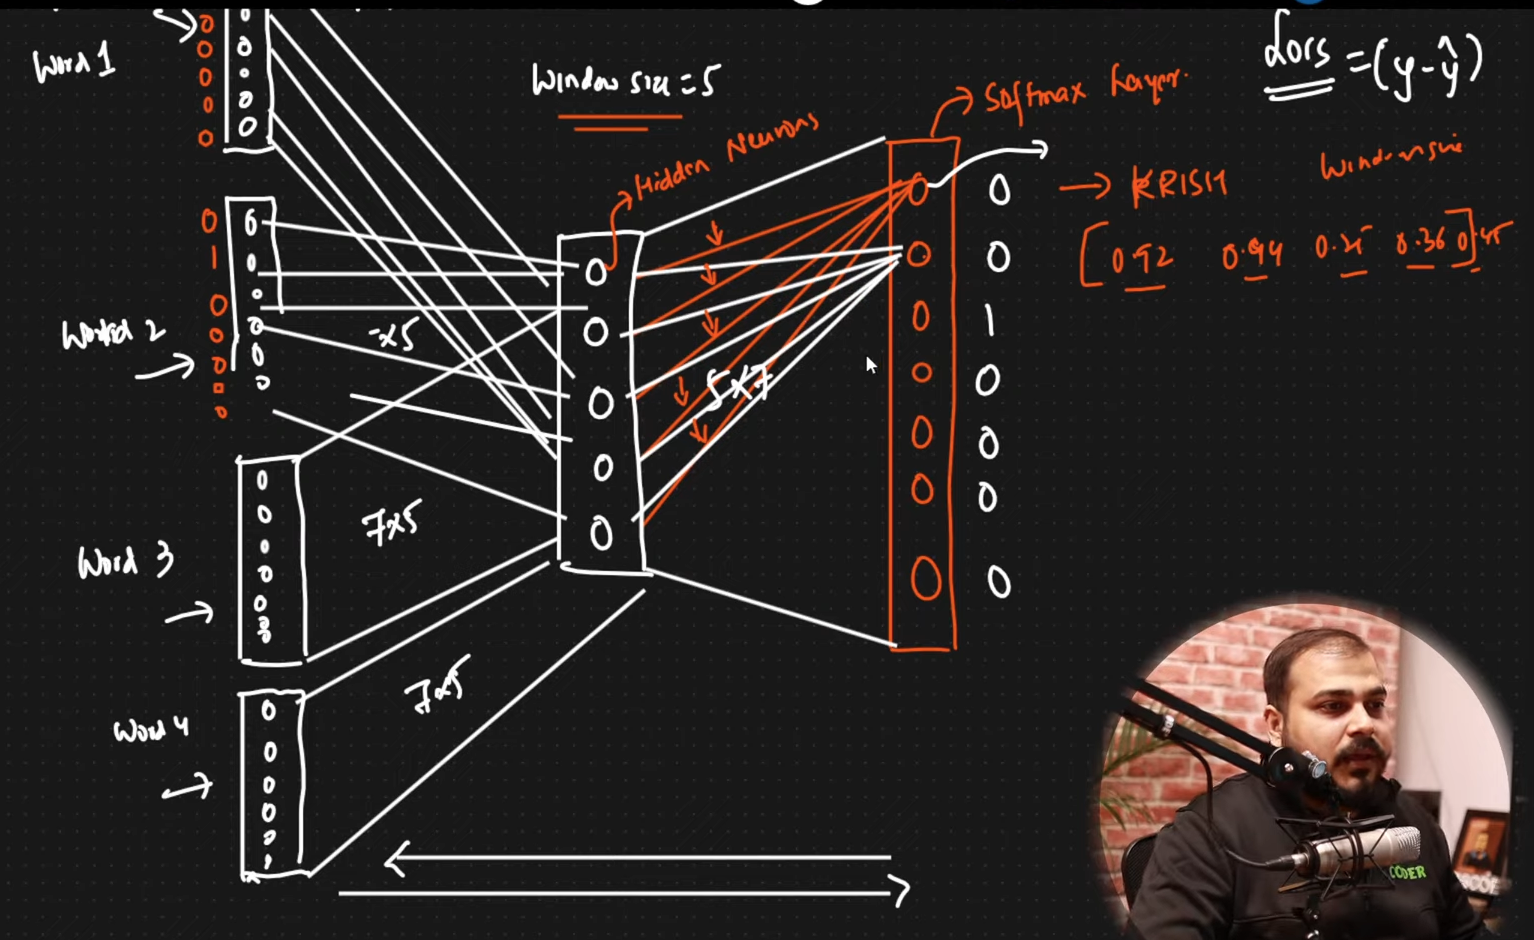

In [2]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
## References: https://stackoverflow.com/questions/46433778/import-googlenews-vectors-negative300-bin

In [3]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [5]:
vec_king.shape

(300,)

In [7]:
wv.most_similar('cricket')

[('cricketing', 0.8372224569320679),
 ('cricketers', 0.8165745139122009),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [8]:
wv.most_similar('happy')

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [9]:
wv.similarity("hockey","sports")

0.5354152

In [15]:
vec=wv['king']-wv['man']+wv['woman']
vec

array([ 4.29687500e-02, -1.78222656e-01, -1.29089355e-01,  1.15234375e-01,
        2.68554688e-03, -1.02294922e-01,  1.95800781e-01, -1.79504395e-01,
        1.95312500e-02,  4.09919739e-01, -3.68164062e-01, -3.96484375e-01,
       -1.56738281e-01,  1.46484375e-03, -9.30175781e-02, -1.16455078e-01,
       -5.51757812e-02, -1.07574463e-01,  7.91015625e-02,  1.98974609e-01,
        2.38525391e-01,  6.34002686e-02, -2.17285156e-02,  0.00000000e+00,
        4.72412109e-02, -2.17773438e-01, -3.44726562e-01,  6.37207031e-02,
        3.16406250e-01, -1.97631836e-01,  8.59375000e-02, -8.11767578e-02,
       -3.71093750e-02,  3.15551758e-01, -3.41796875e-01, -4.68750000e-02,
        9.76562500e-02,  8.39843750e-02, -9.71679688e-02,  5.17578125e-02,
       -5.00488281e-02, -2.20947266e-01,  2.29492188e-01,  1.26403809e-01,
        2.49023438e-01,  2.09960938e-02, -1.09863281e-01,  5.81054688e-02,
       -3.35693359e-02,  1.29577637e-01,  2.41699219e-02,  3.48129272e-02,
       -2.60009766e-01,  

In [16]:
wv.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300516366958618),
 ('monarch', 0.6454660296440125),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]